In [8]:
weight <- c(74,70,66,61,59)

In [9]:
# mean: 평균
mean(weight)

[1] 66

In [10]:
# median: 중앙값-가운데 값
median(weight)

[1] 66

In [11]:
# var: 분산-편차의 제곱의 평균(음수를 없앰으로 얼마나 평균과의 거리를 볼 수 있음) -> 편차의 평균 아니다
var(weight)

[1] 38.5

In [12]:
# sd: 표준편차: 분산에 루트 씌운값 (평균과 차이나는 편차 정도균과 차이나는 편차 정도)
sd(weight)

[1] 6.204837

In [16]:
# 정규분포: 평균갑을 중심으로 하여 좌우 대칭의 종 모양의 분포

weight <- rnorm(n = 100000, mean = 66, sd = 5) # 평균 66kg, 표준편차 5의 데이터 생성

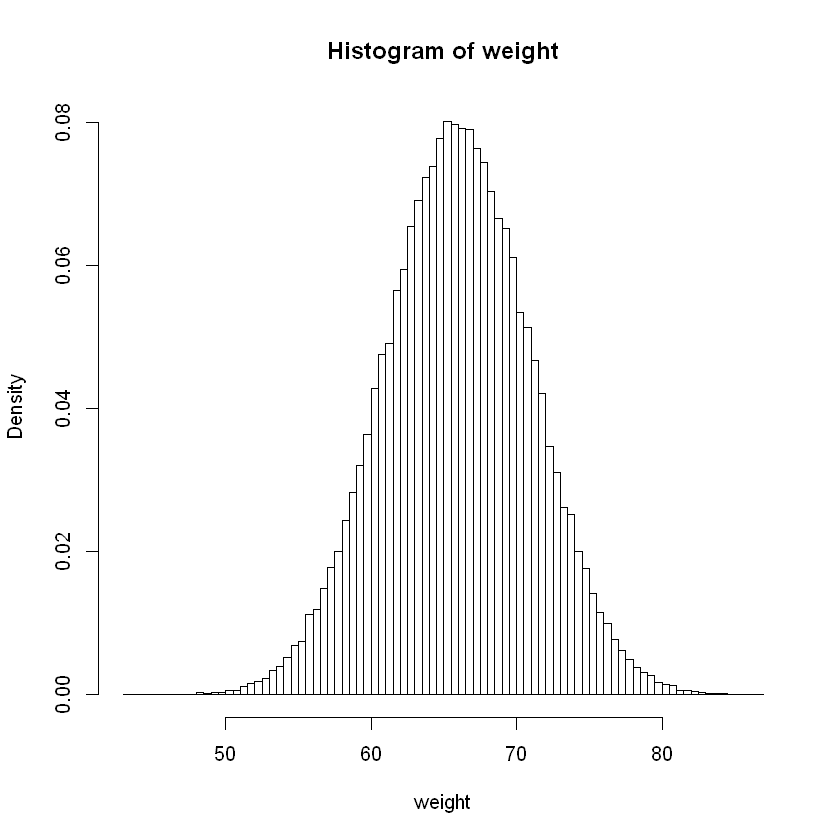

In [17]:
hist(weight, breaks = 100, freq = FALSE) # 히스토그램 그리기

In [26]:
# 귀무 가설: 원하는 가설을 증명하기 위해 기각해야하는 가설
# 대립 가설: 귀무개설과 반대 가설로 검증하고 싶은 가설
# 유의수준: 가설 검정을 할 때 표본 자료에서 얻은 검정 통계량이 기각역에 들어올 확률
# 유의 확률(p-value): 귀무가설을 지지하는 정도 -> 낮아질수록 귀무가설을 기각한다 -> 통계적으로 유의미

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [27]:
# t-검정

test2 <- c(89, 70, 83, 60, 75, 60, 92, 84, 80, 80)     # 표본 집단
t.test(test2, mu = 65)                                 # t-test


#표본 집단의 평균은 77.3kg이고, 검정을 실시한 결과 유의 확률은 0.65%(0.0065)가 나왔습니다. t검정 결과, 유의 수준 5%보다 작은 검정 통계량이므로 귀무 가설을 기각할 수 있습니다. 즉, ‘몸무게 평균은 65kg이다’는 가설을 기각하게 됩니다. 65kg이 아닌 다른 값이 평균 몸무게라는 의미입니다.


	One Sample t-test

data:  test2
t = 3.5149, df = 9, p-value = 0.006568
alternative hypothesis: true mean is not equal to 65
95 percent confidence interval:
 69.38389 85.21611
sample estimates:
mean of x 
     77.3 


In [1]:
library(readxl)
library(dplyr)
library(ggplot2)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")


colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [3]:
table(reservation_r$branch)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    49     18     12     22     15      8     14     10     10      6     20 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    21     22     20     22     13      4     17     10     17     19     10 
  종로   중구   중랑 
    13     18      6 

In [4]:
# 주문 취소되지 않은 경우만 선택
no_cancel_data <- reservation_r %>% filter(cancel == "N")

In [5]:
# 주문 취소되지 않은 예약 건의 부서별 빈도표
table(no_cancel_data$branch)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    41     17     12     19     15      8     11      7      8      5     14 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    18     20     18     17     12      4     15      8     16     18      8 
  종로   중구   중랑 
     7     15      4 

In [6]:
# 데이터 분석을 위해 원천 데이터 가공(전처리)
# reserv_no를 키로 예약, 주문 테이블 연결
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

# item_id를 키로 df_f_join_1, 메뉴 정보 테이블 연결
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")

head(df_f_join_2) # 테이블 세 개가 이너 조인된 것을 확인


reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales,product_name,product_desc,category_id,price
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000,JUICE,주스,BEVERAGE,6000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000,STEAK,스테이크,FOOD,35000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000,SANDWICH,샌드위치,FOOD,10000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000,SALAD_BAR,샐러드바,COMBO,25000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000,SEA_FOOD,씨푸드,FOOD,25000


In [7]:
# 강남, 마포, 서초 지점만 선택
    df_branch_sales <- df_f_join_2 %>%
    filter(branch == "강남" | branch == "마포" | branch == "서초") %>%
    group_by(branch, product_name) %>%           # 부서 이름과 메뉴 이름으로 그룹화
    summarise(sales_amt = sum(sales) / 1000)     # 매출 합산
 

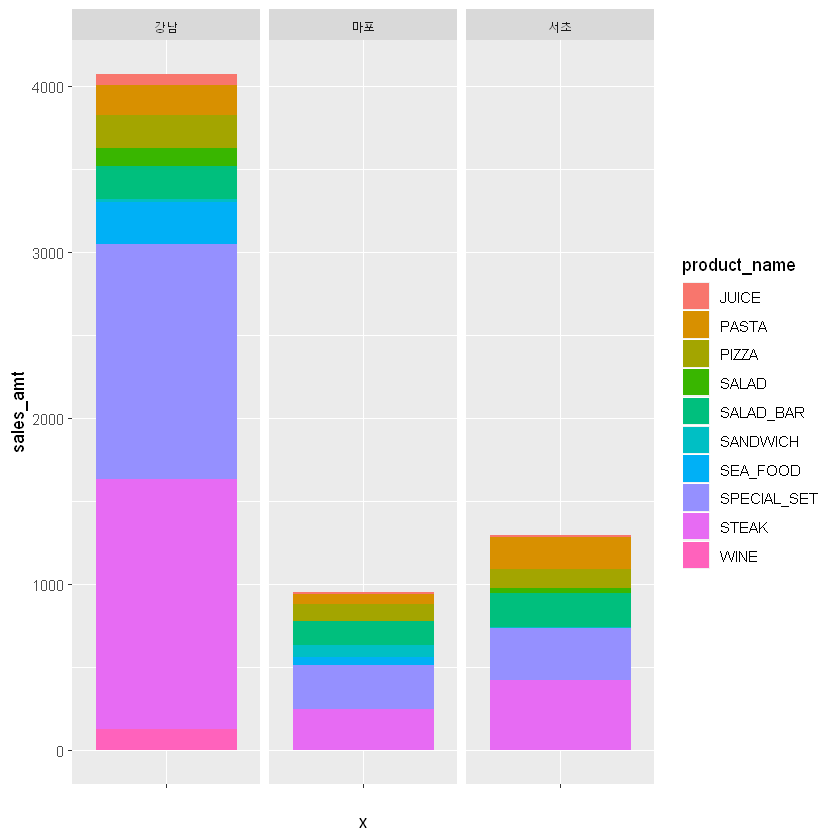

In [8]:
# 누적 막대 그래프 그리기
ggplot(df_branch_sales, aes(x = "", y = sales_amt, fill = product_name)) +
    facet_grid(facets = . ~ branch) + # 면 분할 함수 branch 기준으로 분할
    geom_bar(stat = "identity")

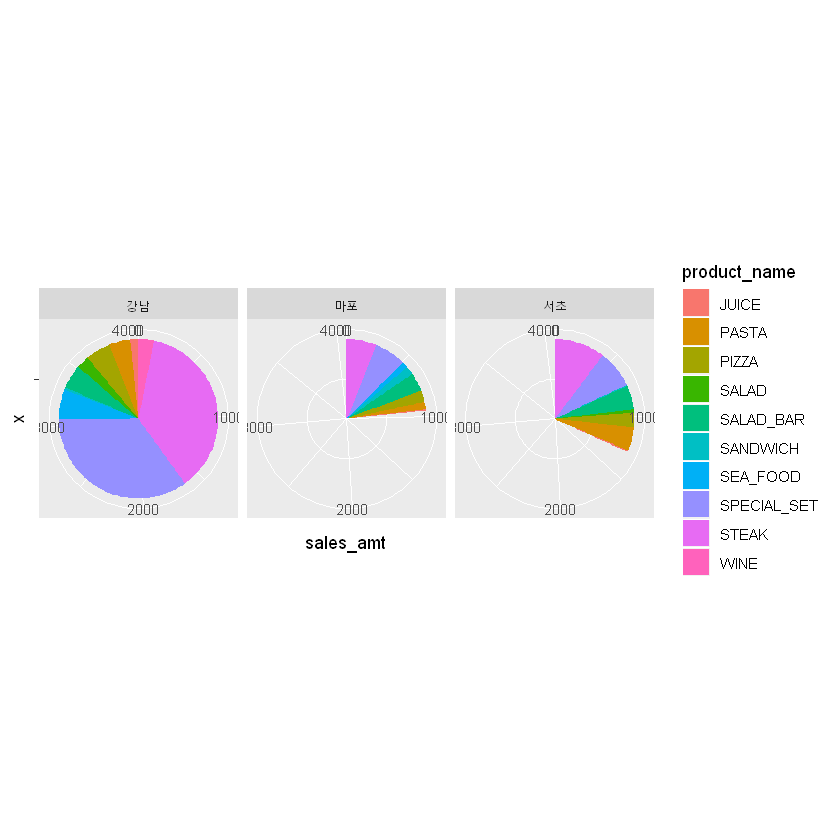

In [9]:
# 파이 차트로 그리기
ggplot(df_branch_sales, aes(x = "", y = sales_amt, fill = product_name)) +
    facet_grid(facets = . ~ branch) +
    geom_bar(stat = "identity") +
    coord_polar("y", start = 0)     # 파이 차트 그리기
 

In [10]:
# reserv_no를 키로 예약, 주문 테이블 연결
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

# item_id를 키로 df_f_join_1, 메뉴 정보 테이블 연결
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")

# 주요 지점만 선택
df_branch_items <- df_f_join_2 %>% filter(branch == "강남" | branch == "마포" | branch == "서초")

# 교차 빈도표 생성
table(df_branch_items$branch, df_branch_items$product_name)

      
       JUICE PASTA PIZZA SALAD SALAD_BAR SANDWICH SEA_FOOD SPECIAL_SET STEAK
  강남     2     4     5     2         3        2        4          13    12
  마포     1     2     4     0         3        3        1           4     3
  서초     1     5     2     1         2        1        0           2     5
      
       WINE
  강남    5
  마포    0
  서초    0

In [11]:
# 데이터 프레임 형태로 구조형 변환
df_branch_items_table <- as.data.frame(table(df_branch_items$branch, df_branch_items$product_name))

# 데이터 분석을 위해 데이터 가공
df_branch_items_percent <- df_branch_items_table %>%
    group_by(df_branch_items_table$Var1) %>%
    mutate(percent_items = Freq/sum(Freq) * 100) # 주문 비율을 계산해서 열 생성

head(df_branch_items_percent)                    # percent_items 열이 생성된 것을 확인


Var1,Var2,Freq,df_branch_items_table$Var1,percent_items
강남,JUICE,2,강남,3.846154
마포,JUICE,1,마포,4.761905
서초,JUICE,1,서초,5.263158
강남,PASTA,4,강남,7.692308
마포,PASTA,2,마포,9.523810
서초,PASTA,5,서초,26.315789


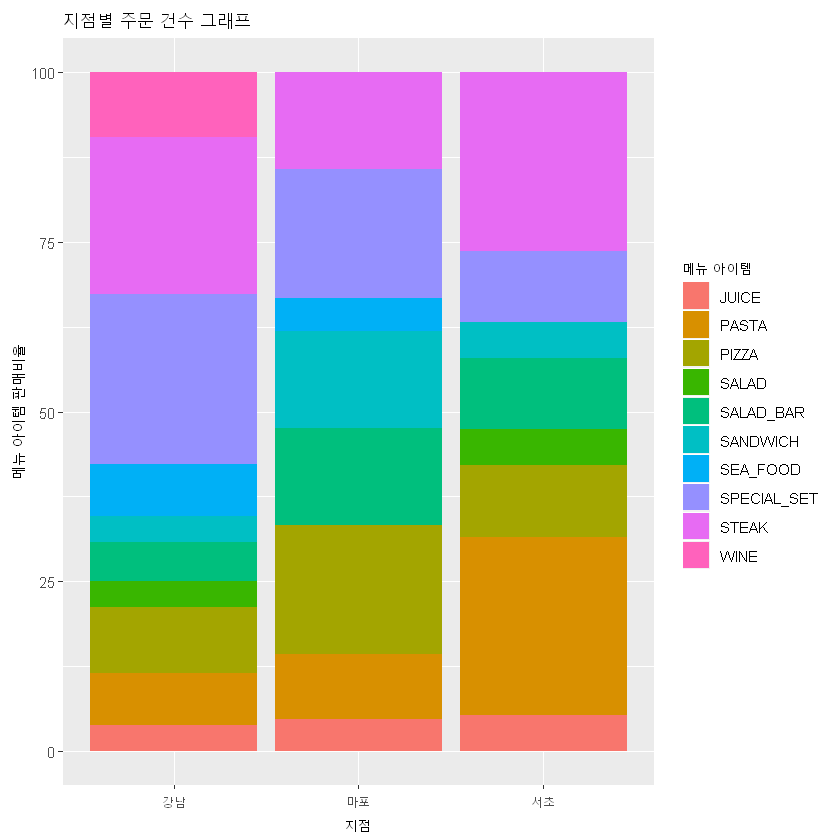

In [12]:
# 누적 막대 그래프를 그려 gg 변수에 담음
gg <- ggplot(df_branch_items_percent, aes(x = Var1, y = percent_items, group = Var1, fill = Var2)) +
    geom_bar(stat = "identity")

# 제목과 범례 이름 지정
gg <- gg +
    labs(title = "지점별 주문 건수 그래프", x = "지점", y = "메뉴 아이템 판매비율", fill = "메뉴 아이템")
gg

In [13]:
# 테이블조인
# reserv_no를 키로 예약, 주문 테이블 연결
df_rfm_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

head(df_rfm_join_1)     # 조인된 테이블 확인


reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000


In [14]:
# 고객 번호별 방문 횟수(F)와 매출(M) 정리
df_rfm_data <- df_rfm_join_1 %>%
    group_by(customer_id) %>%
    summarise(visit_sum = n_distinct(reserv_no), sales_sum = sum(sales) / 1000) %>%
    arrange(customer_id)

df_rfm_data     # 데이터 확인

customer_id,visit_sum,sales_sum
W1327595,2,188
W1327803,2,210
W1328432,3,246
W1328505,5,287
W1328786,1,10
W1328985,2,178
W1328993,1,140
W1329560,1,24
W1329954,1,48
W1329962,2,48


In [15]:
summary(df_rfm_data)

 customer_id          visit_sum       sales_sum      
 Length:170         Min.   :1.000   Min.   :   6.00  
 Class :character   1st Qu.:1.000   1st Qu.:  40.75  
 Mode  :character   Median :1.000   Median : 100.00  
                    Mean   :1.982   Mean   : 146.81  
                    3rd Qu.:3.000   3rd Qu.: 192.00  
                    Max.   :8.000   Max.   :1006.00  

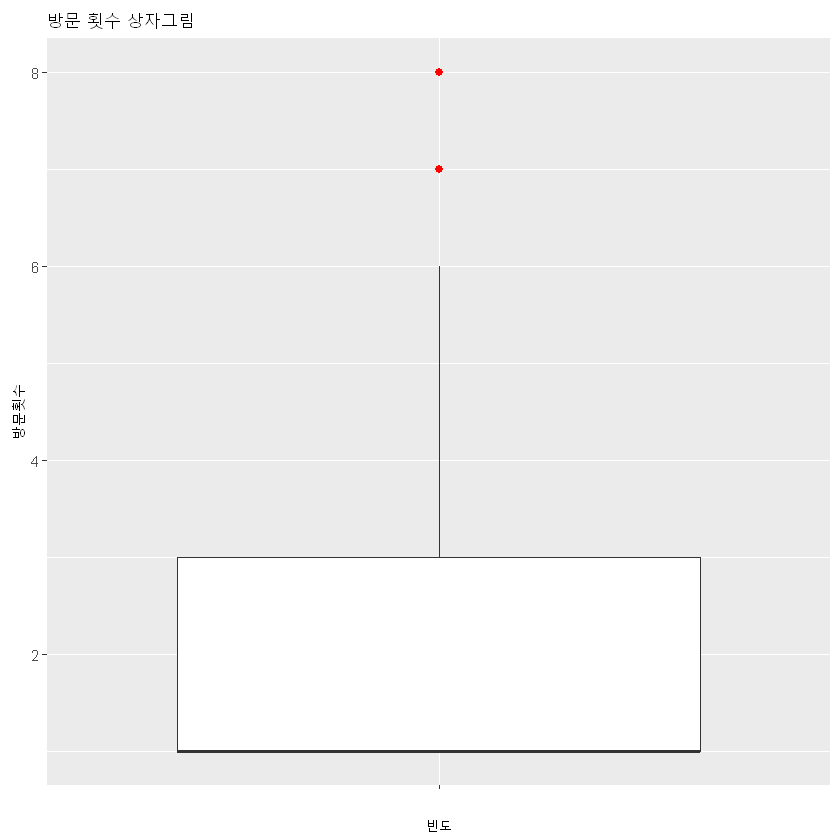

In [16]:
# 상자 그림 그리기
ggplot(df_rfm_data, aes(x = "", y = visit_sum)) +
    geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = "red") +
    labs(title = "방문 횟수 상자그림", x = "빈도", y = "방문횟수")

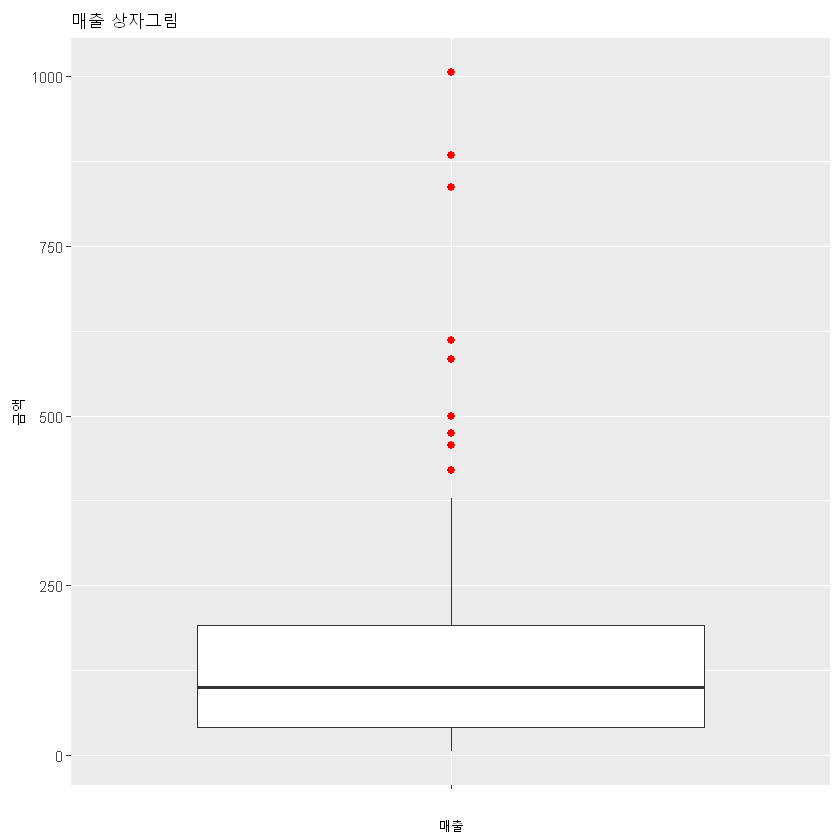

In [17]:
ggplot(df_rfm_data, aes(x = "", y = sales_sum)) +
    geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = "red") +
    labs(title = "매출 상자그림", x = "매출", y = "금액")
 

In [18]:
# 방문 횟수 60%와 90%에 해당하는 분위수 찾기
quantile(df_rfm_data$visit_sum, probs = c(0.6, 0.9))

60% 90% 
  2   4

In [19]:
# 총 방문 횟수와 총 매출 합
total_sum_data <- df_rfm_data %>%
    summarise(t_visit_sum = sum(visit_sum), t_sales_sum = sum(sales_sum))

# 우수 고객 이상의 방문 횟수와 매출 합
loyalty_sum_data <- df_rfm_data %>%
    summarise(l_visit_sum = sum(ifelse(visit_sum > 2, visit_sum, 0)), l_sales_sum = sum(ifelse(sales_sum > 135, sales_sum, 0)))

# 차지하는 비율 확인
loyalty_sum_data / total_sum_data

l_visit_sum,l_sales_sum
0.5163205,0.7496093


In [20]:
# reserv_no를 키로 예약, 주문 테이블 연결
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

# item_id를 키로 df_f_join_1, 메뉴 정보 테이블 연결
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")

target_item <- c("M0005", "M0009")               # 스테이크와 와인

# 스테이크와 메뉴 아이템 동시 주문 여부 확인
df_stime_order <- df_f_join_2 %>%
    filter((item_id %in% target_item)) %>%       # 스테이크나 와인을 주문한 경우 선택
    group_by(reserv_no) %>%                      # 예약 번호로 그룹화
    mutate(order_cnt = n()) %>%                  # 그룹화된 행 세기
    distinct(branch, reserv_no, order_cnt) %>%   # 중복 예약 번호는 하나만 출력
    filter(order_cnt == 2) %>%                   # 2인 경우 선택(스테이크와 와인을 동시 주문한 경우)
    arrange(branch)

# 동시 주문인 경우의 예약 번호 데이터셋(12건)
df_stime_order

branch,reserv_no,order_cnt
강남,2019123107,2
강남,2019122901,2
강남,2019122801,2
강동,2019122810,2
광진,2019122804,2
노원,2019112101,2
동대문,2019091201,2
동대문,2019122703,2
동작,2019112102,2
양천,2019123006,2


In [21]:
# 동시 주문한 예약 번호만 담는 stime_order 변수 생성
stime_order_rsv_no <- df_stime_order$reserv_no    #예약 번호만 선택

# 동시 주문 예약 번호이면서 스테이크와 와인일 경우만 선택
df_stime_sales <- df_f_join_2 %>%
    filter((reserv_no %in% stime_order_rsv_no) & (item_id %in% target_item)) %>%
    group_by(reserv_no, product_name) %>%          # 예약 번호와 메뉴 아이템으로 그룹화
    summarise(sales_amt = sum(sales) / 1000) %>%   # 매출 합계 요약 계산
    arrange(product_name, reserv_no)               # 메뉴 아이템, 예약 번호 기준으로 정렬

# 동시 주문 12건이므로 매출 합계 24개 생성(스테이크+와인)
df_stime_sales
 

reserv_no,product_name,sales_amt
2019091201,STEAK,70
2019112101,STEAK,280
2019112102,STEAK,280
2019120202,STEAK,420
2019122702,STEAK,70
2019122703,STEAK,70
2019122801,STEAK,175
2019122804,STEAK,70
2019122810,STEAK,70
2019122901,STEAK,140


In [22]:
steak <- df_stime_sales %>% filter(product_name == "STEAK")   # 스테이크 정보만 담음
wine <- df_stime_sales %>% filter(product_name == "WINE")     # 와인 정보만 담음
 

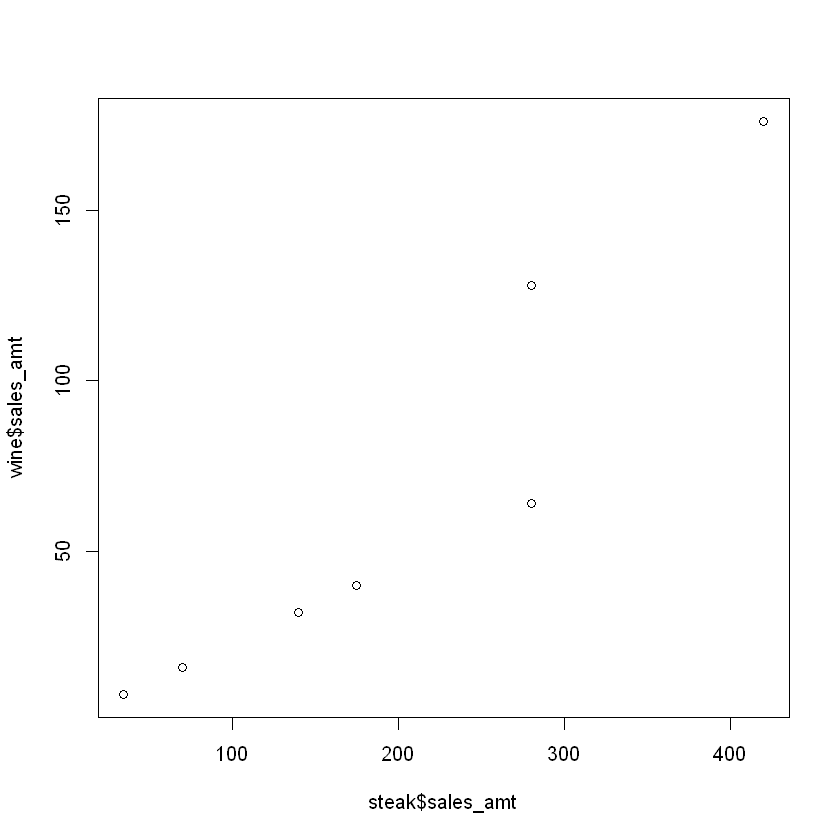

In [23]:
plot(steak$sales_amt, wine$sales_amt)     # 스테이크와 와인의 매출 상관도 그리기

In [24]:
cor.test(steak$sales_amt, wine$sales_amt)     # 상관관계 확인


	Pearson's product-moment correlation

data:  steak$sales_amt and wine$sales_amt
t = 9.5423, df = 10, p-value = 2.438e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8244838 0.9859970
sample estimates:
      cor 
0.9492339 


In [25]:
df_rsv_customer <- reservation_r %>%
select(customer_id, reserv_no) %>%    # 고객별 모든 예약 번호 선택
    arrange(customer_id, reserv_no)

head(df_rsv_customer)                 # 고객별 예약 번호 확인
 

customer_id,reserv_no
W1327595,2019061801
W1327595,2019071801
W1327803,2019060301
W1327803,2019091506
W1328432,2019060601
W1328432,2019060701


In [26]:
# (B) 스테이크 주문 예약 번호 데이터셋 생성
    df_steak_order_rsv_no <- order_info_r %>%
    filter(item_id == "M0005") %>%   # 스테이크 주문이면
    mutate(steak_order = "Y") %>%    # steak_order 열 데이터를 ‘Y’로 만듦
    arrange(reserv_no)

head(df_steak_order_rsv_no)          # 데이터셋 확인
 

order_no,item_id,reserv_no,quantity,sales,steak_order
190603578341100100,M0005,2019060301,4,140000,Y
190606607189610010,M0005,2019060601,4,140000,Y
190616137200510010,M0005,2019061601,3,105000,Y
190708517202310010,M0005,2019070801,2,70000,Y
190710578348100100,M0005,2019071002,3,105000,Y
190718107186310010,M0005,2019071801,4,140000,Y


In [27]:
# 고객의 모든 예약 번호(A)에 대해 스테이크 주문한 예약 번호(B)를 레프트 조인
df_steak_order_1 <- left_join(df_rsv_customer, df_steak_order_rsv_no, by = "reserv_no") %>%
    group_by(customer_id) %>%                                       # 고객 번호로 그룹화하여(182명)
    mutate(steak_order = ifelse(is.na(steak_order), "N", "Y")) %>%  # 주문 여부가 NA이면 N, Y이면 Y로 바꿈
    summarise(steak_order = max (steak_order)) %>%                  # 최댓값만 취함
    arrange(customer_id)

# 최종 정리된 고객별 스테이크 주문 여부
df_dpd_var <- df_steak_order_1

# 종속 변수, 최종 고객 182명의 스테이크 주문 여부 결과 확인
df_dpd_var

customer_id,steak_order
W1327595,Y
W1327803,Y
W1328432,Y
W1328505,N
W1328786,N
W1328985,Y
W1328993,Y
W1329560,N
W1329954,N
W1329962,N


In [28]:
# 결측치 제거
df_customer <- customer_r %>% filter(!is.na(sex_code))
# 성별이 없으면(NA) 고객 번호 제거

# 고객 테이블과 예약 테이블 customer_id를 키로 이너 조인
df_table_join_1 <- inner_join(df_customer, reservation_r, by = "customer_id")

# df_table_join_1과 주문 테이블의 reserv_no를 키로 이너 조인
df_table_join_2 <- inner_join(df_table_join_1, order_info_r, by = "reserv_no")
str(df_table_join_2)     # df_table_join_2 테이블 구조 확인


Classes 'tbl_df', 'tbl' and 'data.frame':	322 obs. of  19 variables:
 $ customer_id   : chr  "W1346506" "W1347648" "W1347756" "W1347984" ...
 $ customer_name : chr  "고객71" "고객72" "고객73" "고객74" ...
 $ phone_number  : chr  "010-1111-1181" "010-1111-1182" "010-1111-1183" "010-1111-1184" ...
 $ email         : chr  "scust71@sfnb.co.kr" "scust72@sfnb.co.kr" "scust73@sfnb.co.kr" "scust74@sfnb.co.kr" ...
 $ first_reg_date: chr  "19/09/01" "19/09/04" "19/09/05" "19/09/06" ...
 $ sex_code      : chr  "F" "M" "M" "M" ...
 $ birth         : chr  "19820922" "19940812" "19931217" "19810822" ...
 $ job           : chr  "자영업" "학생" NA "자영업" ...
 $ zip_code      : chr  "122100" "140100" "152100" "130100" ...
 $ reserv_no     : chr  "2019102002" "2019092301" "2019111301" "2019120201" ...
 $ reserv_date   : chr  "20191020" "20190923" "20191113" "20191202" ...
 $ reserv_time   : chr  "1800" "1800" "1200" "1200" ...
 $ branch        : chr  "중구" "강남" "중구" "송파" ...
 $ visitor_cnt   : num  2 1 2 3 2 2 2 2 1 2

In [29]:
# 고객 정보, 성별 정보와 방문 횟수, 방문객 수, 매출 합을 요약
df_table_join_3 <- df_table_join_2 %>%
    group_by(customer_id, sex_code, reserv_no, visitor_cnt) %>% 
    summarise(sales_sum = sum(sales)) %>%
    group_by(customer_id, sex_code) %>%                         
    summarise(visit_sum = n_distinct(reserv_no), visitor_sum = sum(visitor_cnt), sales_sum = sum(sales_sum) / 1000) %>%     # ⓒ
    arrange(customer_id)

df_idp_var <- df_table_join_3   # 독립 변수

df_idp_var                      # 독립 변수 확인(142행)

customer_id,sex_code,visit_sum,visitor_sum,sales_sum
W1327595,M,2,6,188
W1327803,M,2,6,210
W1328432,M,3,12,246
W1328505,F,5,15,287
W1328786,M,1,1,10
W1328985,M,2,6,178
W1328993,F,1,4,140
W1329560,M,1,2,24
W1329954,M,1,2,48
W1329962,M,2,4,48


In [30]:
# 독립 변수 데이터셋(①-2)에 종속 변수 데이터셋(①-1) 이너 조인
df_final_data <- inner_join(df_idp_var, df_dpd_var, by = "customer_id")

# 의사 결정 나무 함수를 사용하려고 열 구조를 팩터형으로 바꿈
df_final_data$sex_code <- as.factor(df_final_data$sex_code)
df_final_data$steak_order <- as.factor(df_final_data$steak_order)

df_final_data <- df_final_data[, c(2:6)]   # 의사 결정 나무에 필요한 열만 선택
df_final_data                              # 최종 분석용 데이터셋 확인
 

sex_code,visit_sum,visitor_sum,sales_sum,steak_order
M,2,6,188,Y
M,2,6,210,Y
M,3,12,246,Y
F,5,15,287,N
M,1,1,10,N
M,2,6,178,Y
F,1,4,140,Y
M,1,2,24,N
M,1,2,48,N
M,2,4,48,N
